In [1]:


from Monk.monk import *
from torch import optim
from torch.optim import lr_scheduler

# Monk 1

In [2]:
parameter_grid = {
    "learning_rate": np.linspace(0.01, 0.6, 50),
    "momentum": [0.0, 0.9, 0.8, 0.7],
    "nesterov": [True, False]
}
print(parameter_grid)

{'learning_rate': array([0.01      , 0.02204082, 0.03408163, 0.04612245, 0.05816327,
       0.07020408, 0.0822449 , 0.09428571, 0.10632653, 0.11836735,
       0.13040816, 0.14244898, 0.1544898 , 0.16653061, 0.17857143,
       0.19061224, 0.20265306, 0.21469388, 0.22673469, 0.23877551,
       0.25081633, 0.26285714, 0.27489796, 0.28693878, 0.29897959,
       0.31102041, 0.32306122, 0.33510204, 0.34714286, 0.35918367,
       0.37122449, 0.38326531, 0.39530612, 0.40734694, 0.41938776,
       0.43142857, 0.44346939, 0.4555102 , 0.46755102, 0.47959184,
       0.49163265, 0.50367347, 0.51571429, 0.5277551 , 0.53979592,
       0.55183673, 0.56387755, 0.57591837, 0.58795918, 0.6       ]), 'momentum': [0.0, 0.9, 0.85, 0.8], 'nesterov': [True, False]}


In [3]:
#try random seeds
lowest_loss = 1
lowest_avg_loss = 1
for lr in parameter_grid["learning_rate"]:
    for momentum in parameter_grid["momentum"]:
        for nesterov in parameter_grid["nesterov"]:
            if nesterov and momentum == 0:
                continue
            loss_across_seeds = []
            acc_across_seeds = []
            overfit_across_seeds = []
            for seed in [18, 30, 42, 69, 100]:
                torch.manual_seed(seed)
                model = SimpleNN(17, 3, 1)
                optimizer = optim.SGD(model.parameters(), lr=lr, momentum=momentum, nesterov=nesterov and momentum > 0)
                overfit, acc, loss, = monk("monks-1", optimizer=optimizer, neural_network=model, num_epochs=500,
                                           lr_scheduler=None,
                                           verbose=False)
                loss_across_seeds.append(loss)
                acc_across_seeds.append(acc)
                overfit_across_seeds.append(overfit)
                if acc > 0.99 and overfit < 0.04:
                    if loss < lowest_loss:
                        lowest_loss = loss
                        print(
                            f"New best seed: 3 neuron lr: {lr}, momentum: {momentum}, nesterov: {nesterov}, loss: {loss}, acc: {acc}, overfit: {overfit}, seed: {seed}")

            avg_acc = np.mean(acc_across_seeds)
            avg_loss = np.mean(loss_across_seeds)
            if avg_acc > 0.99 and avg_loss < lowest_avg_loss and np.mean(overfit_across_seeds) < 0.04:
                lowest_avg_loss = avg_loss
                print(f"New best across: 3 neuron lr: {lr}, momentum: {momentum}, nesterov: {nesterov}, loss: {np.mean(loss_across_seeds)}, acc: {np.mean(acc_across_seeds)}")


New best seed: 3 neuron lr: 0.10632653061224488, momentum: 0.9, nesterov: True, loss: 0.014256940223276615, acc: 1.0, overfit: 0.03877621019879977, seed: 42
New best seed: 3 neuron lr: 0.10632653061224488, momentum: 0.9, nesterov: False, loss: 0.014155400916934013, acc: 1.0, overfit: 0.0389842086152084, seed: 42
New best seed: 3 neuron lr: 0.1183673469387755, momentum: 0.9, nesterov: True, loss: 0.013283703476190567, acc: 1.0, overfit: 0.03844427708920877, seed: 42
New best seed: 3 neuron lr: 0.1304081632653061, momentum: 0.9, nesterov: True, loss: 0.012242752127349377, acc: 1.0, overfit: 0.038013189806760016, seed: 42
New best seed: 3 neuron lr: 0.14244897959183672, momentum: 0.9, nesterov: True, loss: 0.011498949490487576, acc: 1.0, overfit: 0.03774641091366867, seed: 42
New best seed: 3 neuron lr: 0.14244897959183672, momentum: 0.9, nesterov: False, loss: 0.011345534585416317, acc: 1.0, overfit: 0.03803280147110081, seed: 42
New best seed: 3 neuron lr: 0.15448979591836734, momentum:

Overfitting Score: 0.0355


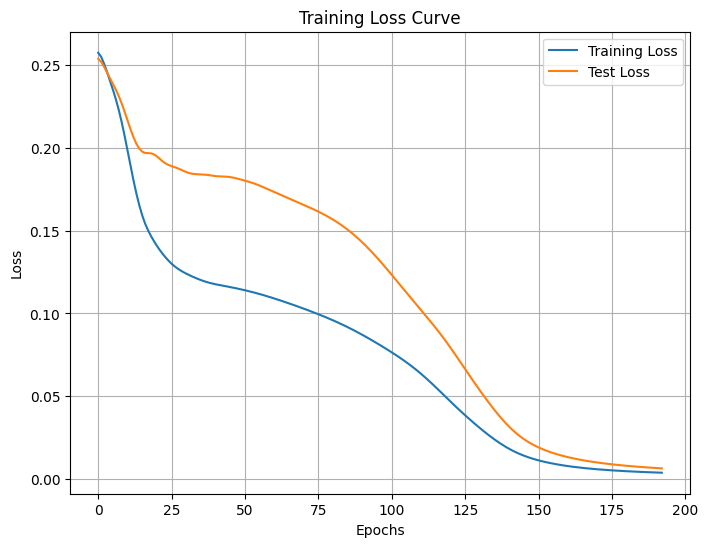

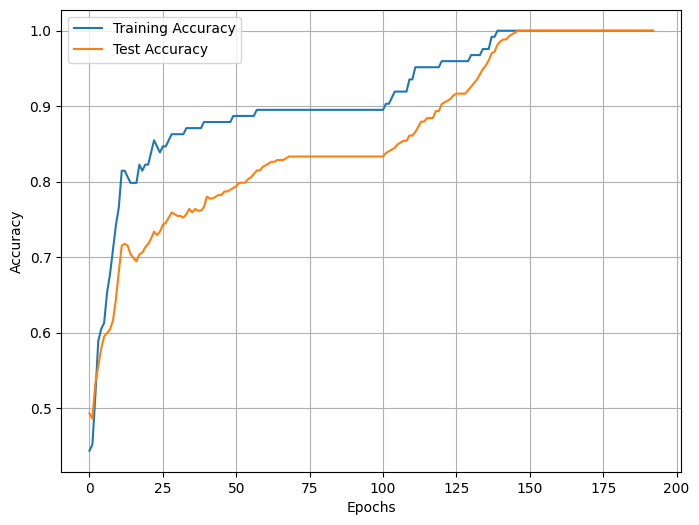

(0.03554839888886775, 1.0, 0.00633218651637435)

In [13]:
lr = 0.5687755102040817
momentum = 0.85
nesterov = False
epochs = 500
torch.manual_seed(42)
model = SimpleNN(17, 3, 1)
optimizer = optim.SGD(model.parameters(), lr=lr, momentum=momentum, nesterov=nesterov)
monk("monks-1", optimizer=optimizer, neural_network=model, num_epochs=epochs, lr_scheduler=None)

# Monk 2

In [16]:
#try random seeds
lowest_loss = 1
lowest_avg_loss = 1

for lr in parameter_grid["learning_rate"]:
    for momentum in parameter_grid["momentum"]:
        for nesterov in parameter_grid["nesterov"]:
            if nesterov and momentum == 0:
                continue
            loss_across_seeds = []
            acc_across_seeds = []
            overfit_across_seeds = []
            for seed in [18, 30, 42, 69, 100]:
                torch.manual_seed(seed)
                model = SimpleNN(17, 3, 1)
                optimizer = optim.SGD(model.parameters(), lr=lr, momentum=momentum, nesterov=nesterov and momentum > 0)
                overfit, acc, loss, = monk("monks-2", optimizer=optimizer, neural_network=model, num_epochs=500,
                                           lr_scheduler=None,
                                           verbose=False)
                loss_across_seeds.append(loss)
                acc_across_seeds.append(acc)
                overfit_across_seeds.append(overfit)
                if acc > 0.98 and overfit < 0.01:
                    if loss < lowest_loss:
                        lowest_loss = loss
                        print(
                            f"New best seed 3 neuron lr: {lr}, momentum: {momentum}, nesterov: {nesterov}, loss: {loss}, acc: {acc}, overfit: {overfit} seed: {seed}")

            avg_acc = np.mean(acc_across_seeds)
            avg_loss = np.mean(loss_across_seeds)
            if avg_acc > 0.98 and avg_loss < lowest_avg_loss and np.mean(overfit_across_seeds) < 0.01:
                lowest_avg_loss = avg_loss
                print(f"New best average 3 neuron lr: {lr}, momentum: {momentum}, nesterov: {nesterov}, loss: {avg_loss}, acc: {avg_acc}")

New best seed 3 neuron lr: 0.1, momentum: 0.9, nesterov: True, loss: 0.00909931305795908, acc: 1.0, overfit: 0.008232770212452603 seed: 42
New best seed 3 neuron lr: 0.1, momentum: 0.9, nesterov: False, loss: 0.00901028886437416, acc: 1.0, overfit: 0.008284054224370656 seed: 42
New best seed 3 neuron lr: 0.12631578947368421, momentum: 0.9, nesterov: True, loss: 0.0074710180051624775, acc: 1.0, overfit: 0.008004573297997315 seed: 42
New best seed 3 neuron lr: 0.15263157894736842, momentum: 0.9, nesterov: True, loss: 0.006834896747022867, acc: 1.0, overfit: 0.007990205600377052 seed: 42
New best seed 3 neuron lr: 0.15263157894736842, momentum: 0.9, nesterov: False, loss: 0.006794755347073078, acc: 1.0, overfit: 0.00810023916701365 seed: 42
New best seed 3 neuron lr: 0.17894736842105263, momentum: 0.9, nesterov: True, loss: 0.006233590189367533, acc: 1.0, overfit: 0.007964710335839878 seed: 42
New best seed 3 neuron lr: 0.17894736842105263, momentum: 0.9, nesterov: False, loss: 0.00589922

In [15]:
lr = 0.6
momentum = 0.9
nesterov = False
epochs = 500

Overfitting Score: 0.0069


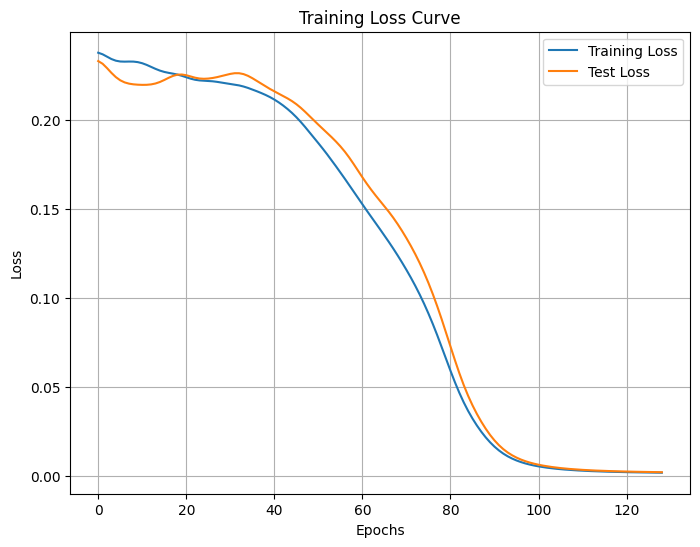

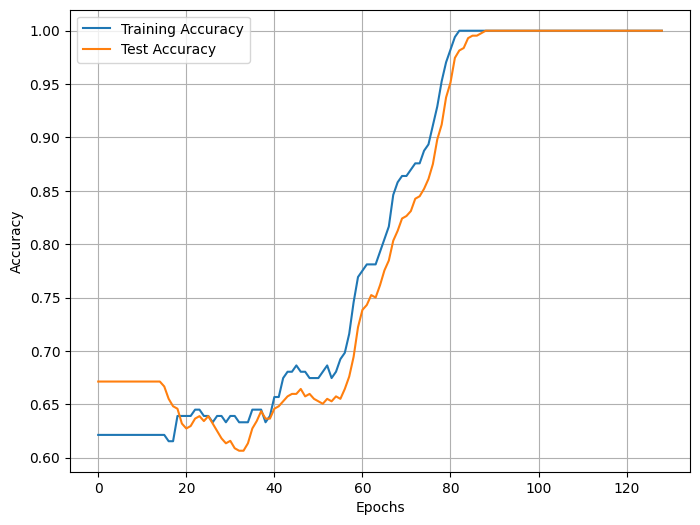

(0.006875526041781544, 1.0, 0.0018656839383766055)

In [7]:
torch.manual_seed(100)
model = SimpleNN(17, 3, 1)
optimizer = optim.SGD(model.parameters(), lr=lr, momentum=momentum, nesterov=nesterov)
monk("monks-2", optimizer=optimizer, neural_network=model, num_epochs=epochs, lr_scheduler=None, eps=0.00025)

# Monk3

In [17]:
lowest_loss = 1
lowest_avg_loss = 1
for lr in parameter_grid["learning_rate"]:
    for momentum in parameter_grid["momentum"]:
        for nesterov in parameter_grid["nesterov"]:
            if nesterov and momentum == 0:
                continue
            loss_across_seeds = []
            acc_across_seeds = []
            overfit_across_seeds = []
            for seed in [18, 30, 42, 69, 100]:
                torch.manual_seed(seed)
                model = SimpleNN(17, 3, 1)
                optimizer = optim.SGD(model.parameters(), lr=lr, momentum=momentum, nesterov=nesterov and momentum > 0)
                overfit, acc, loss, = monk("monks-3", optimizer=optimizer, neural_network=model, num_epochs=500,
                                           lr_scheduler=None,
                                           verbose=False)
                loss_across_seeds.append(loss)
                acc_across_seeds.append(acc)
                overfit_across_seeds.append(overfit)

                if acc > 0.95 and overfit < 0.03:
                    if loss < lowest_loss:
                        lowest_loss = loss
                        print(
                            f"Best seed 3 neuron lr: {lr}, momentum: {momentum}, nesterov: {nesterov}, loss: {loss}, acc: {acc}, overfit: {overfit}, seed: {seed}")
            avg_acc = np.mean(acc_across_seeds)
            avg_loss = np.mean(loss_across_seeds)
            if avg_acc > 0.95 and avg_loss < lowest_avg_loss and np.mean(overfit_across_seeds) < 0.03:
                lowest_avg_loss = avg_loss
                print(f"Best overall 3 neuron lr: {lr}, momentum: {momentum}, nesterov: {nesterov}, loss: {avg_loss}, acc: {avg_acc}")


Best seed 3 neuron lr: 0.1, momentum: 0.0, nesterov: False, loss: 0.0526321679353714, acc: 0.9722222222222222, overfit: 0.006284892297321516, seed: 18
Best seed 3 neuron lr: 0.1, momentum: 0.0, nesterov: False, loss: 0.050572410225868225, acc: 0.9722222222222222, overfit: 0.007528178521356839, seed: 30
Best seed 3 neuron lr: 0.1, momentum: 0.0, nesterov: False, loss: 0.049153149127960205, acc: 0.9722222222222222, overfit: 0.008530332534089347, seed: 100
Best overall 3 neuron lr: 0.1, momentum: 0.0, nesterov: False, loss: 0.050875923782587054, acc: 0.9722222222222221
Best seed 3 neuron lr: 0.1, momentum: 0.9, nesterov: True, loss: 0.0449807345867157, acc: 0.9560185185185185, overfit: 0.005669693989578143, seed: 18
Best seed 3 neuron lr: 0.1, momentum: 0.9, nesterov: True, loss: 0.04497627168893814, acc: 0.9560185185185185, overfit: 0.006663313149509574, seed: 30
Best seed 3 neuron lr: 0.1, momentum: 0.9, nesterov: True, loss: 0.04379149153828621, acc: 0.9583333333333334, overfit: 0.0067

In [18]:
lr = 0.5736842105263158
momentum = 0.
decay = 0.0
nesterov = False
epochs = 300

Overfitting Score: 0.0111


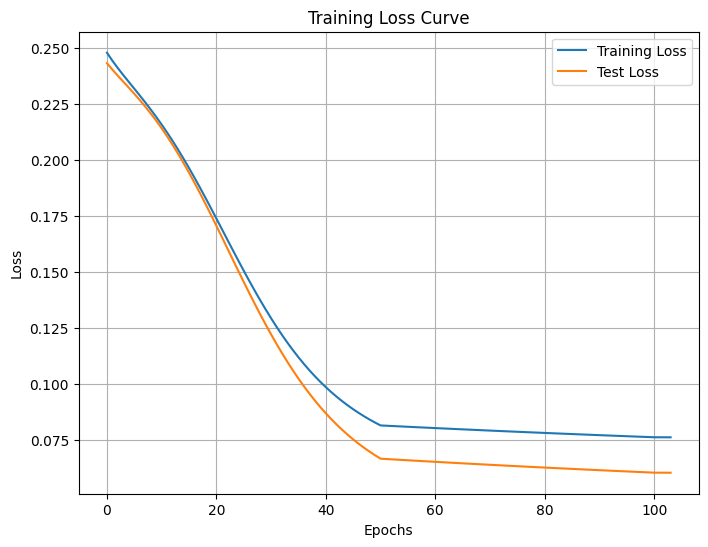

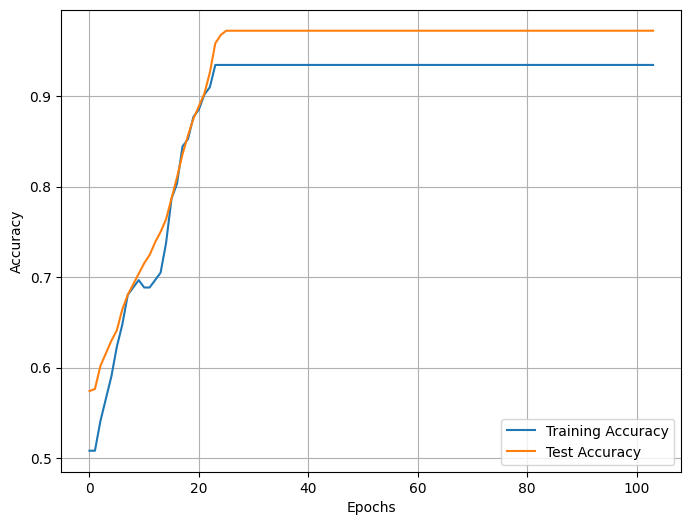

(0.011073892542089406, 0.9722222222222222, 0.06043267250061035)

In [22]:
model = SimpleNN(17, 3, 1)
optimizer = optim.SGD(model.parameters(), lr=lr, momentum=momentum, weight_decay=decay, nesterov=nesterov)
lrs = lr_scheduler.StepLR(optimizer, step_size=50, gamma=0.1)
monk("monks-3", optimizer=optimizer, neural_network=model, num_epochs=epochs, lr_scheduler=lrs)

In [24]:
parameter_grid = {
    "learning_rate": np.linspace(0.1, 0.6, 20),
    "momentum": [0.0, 0.9, 0.85, 0.8],
    "nesterov": [True, False],
    "decay": np.linspace(0.001, 0.006, 10)
}

In [26]:
lowest_loss = 1
lowest_avg_loss = 1
for lr in parameter_grid["learning_rate"]:
    for decay in parameter_grid["decay"]:
        for momentum in parameter_grid["momentum"]:
            for nesterov in parameter_grid["nesterov"]:
                if nesterov and momentum == 0:
                    continue

                loss_across_seeds = []
                acc_across_seeds = []
                overfit_across_seeds = []
                for seed in [18, 30, 42, 69, 100]:
                    torch.manual_seed(seed)
                    model = SimpleNN(17, 3, 1)
                    optimizer = optim.SGD(model.parameters(), lr=lr, momentum=momentum, nesterov=nesterov and momentum > 0,
                                          weight_decay=decay)
                    overfit, acc, loss, = monk("monks-3", optimizer=optimizer, neural_network=model, num_epochs=500,
                                               lr_scheduler=None,
                                               verbose=False)
                    loss_across_seeds.append(loss)
                    acc_across_seeds.append(acc)
                    overfit_across_seeds.append(overfit)
                    if acc > 0.965 and overfit < 0.01:
                        if loss < lowest_loss:
                            lowest_loss = loss
                            print(
                                f" Best seed 3 neuron lr: {lr}, momentum: {momentum}, nesterov: {nesterov}, decay: {decay}, loss: {loss}, acc: {acc}, overfit: {overfit}, seed: {seed}")

                avg_acc = np.mean(acc_across_seeds)
                avg_loss = np.mean(loss_across_seeds)
                if avg_acc > 0.965 and avg_loss < lowest_avg_loss and np.mean(overfit_across_seeds) < 0.01:
                    lowest_avg_loss = avg_loss
                    print(f"Best overall 3 neuron lr: {lr}, momentum: {momentum}, nesterov: {nesterov}, decay: {decay}, loss: {avg_loss}, acc: {avg_acc}")


 Best seed 3 neuron lr: 0.1, momentum: 0.0, nesterov: False, decay: 0.001, loss: 0.05355582386255264, acc: 0.9722222222222222, overfit: 0.0062740065157413484, seed: 18
 Best seed 3 neuron lr: 0.1, momentum: 0.0, nesterov: False, decay: 0.001, loss: 0.051857803016901016, acc: 0.9722222222222222, overfit: 0.0073834833773699675, seed: 30
 Best seed 3 neuron lr: 0.1, momentum: 0.0, nesterov: False, decay: 0.001, loss: 0.050247255712747574, acc: 0.9722222222222222, overfit: 0.008407993505844908, seed: 100
Best overall 3 neuron lr: 0.1, momentum: 0.0, nesterov: False, decay: 0.001, loss: 0.05202530324459076, acc: 0.9722222222222221
 Best seed 3 neuron lr: 0.1, momentum: 0.85, nesterov: True, decay: 0.001, loss: 0.04395492374897003, acc: 0.9652777777777778, overfit: 0.008563467120337818, seed: 69
 Best seed 3 neuron lr: 0.1, momentum: 0.85, nesterov: True, decay: 0.001, loss: 0.043191343545913696, acc: 0.9652777777777778, overfit: 0.00970875574338356, seed: 100
 Best seed 3 neuron lr: 0.1, mo

Overfitting Score: 0.0092


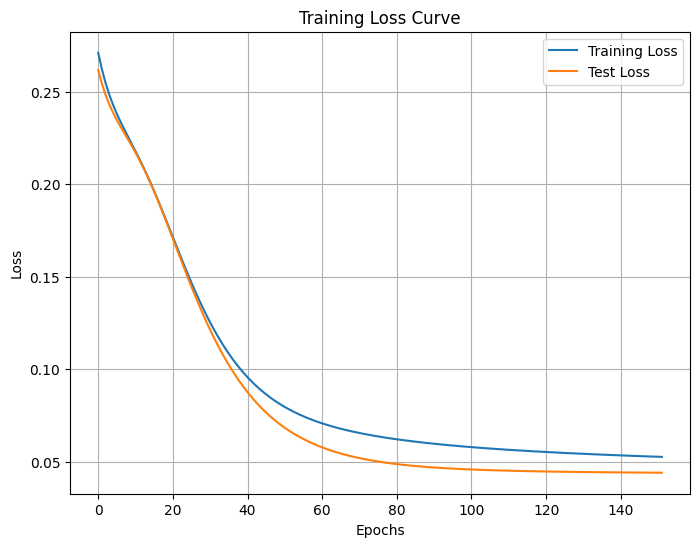

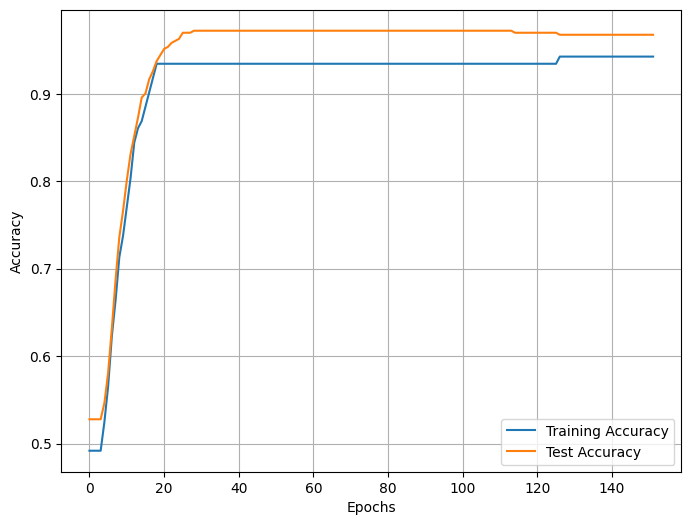

(0.009228150213235304, 0.9675925925925926, 0.044023752212524414)

In [43]:
decay = 0.001
lr = 0.6
momentum = 0.
nesterov = False
torch.manual_seed(69)
model = SimpleNN(17, 3, 1)
optimizer = optim.SGD(model.parameters(), lr=lr, momentum=momentum, weight_decay=decay, nesterov=nesterov)
monk("monks-3", optimizer=optimizer, neural_network=model, num_epochs=500, lr_scheduler=None)

Overfitting Score: 0.0074


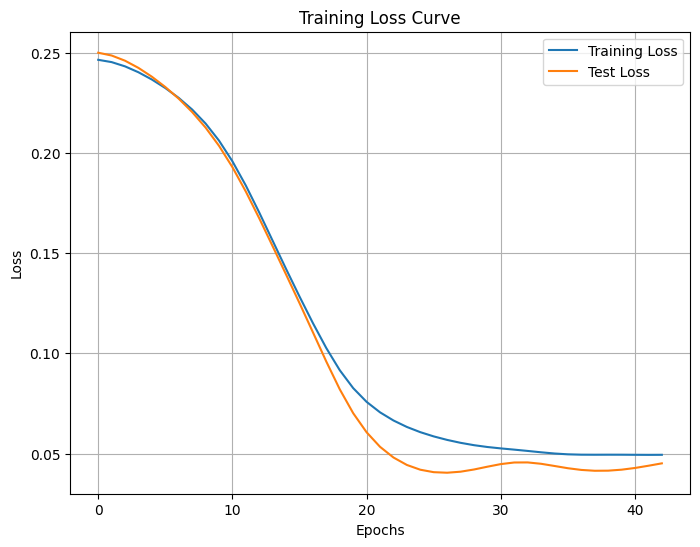

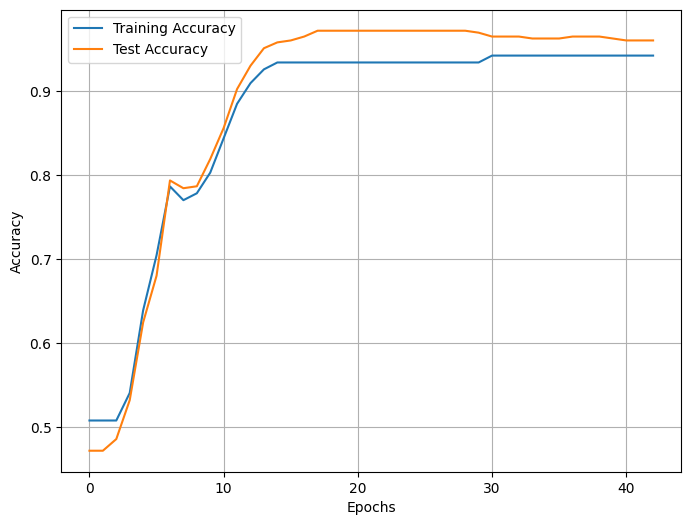

(0.007350898499405662, 0.9606481481481481, 0.04516175016760826)

In [44]:
decay = 0.005
lr = 0.32
momentum = 0.9
nesterov = False
torch.manual_seed(100)
model = SimpleNN(17, 3, 1)
optimizer = optim.SGD(model.parameters(), lr=lr, momentum=momentum, weight_decay=decay, nesterov=nesterov)
monk("monks-3", optimizer=optimizer, neural_network=model, num_epochs=500, lr_scheduler=None)